    Cargar Datos de Ventas

In [8]:
import requests
import pandas as pd
import json

url = 'https://www.sharwinn.com/wp-json/wc/v3/orders'                   # url
params = {
    'consumer_key': 'ck_e88ed88e0a1684cd729a37dee41c2a3cb503b0ec',      # CK
    'consumer_secret': 'cs_0cc67c5057e588a91ba99b38271729baeb83dc56',   # CS
    'per_page': 100,                                                    # número de pedidos por página
    'meta_data': ['_yith_pos_cashier', '[P] _alg_wc_cog_cost']     # Metadata
}
orders = []                                                             # lista para almacenar los pedidos
#response = requests.get(url, params=params)                             # Consulta para extraer el número de páginas
#npages=round(int(response.headers['X-WP-Total'])/100)+1                 # Conseguimos el número de Páginas

for page in range(1, 10):                                           # Ciclo For para extraer la data
    params['page'] = page
    response = requests.get(url, params=params)
    orders += response.json()

df_agrupada = pd.DataFrame(orders)                                               # Convertimos en DataFrame

df_expanded = df_agrupada.explode('line_items')
df_expanded = pd.concat([df_expanded.drop(['line_items'], axis=1), df_expanded['line_items'].apply(pd.Series)], axis=1)

In [9]:
df_expanded.shape

(1065, 66)

In [10]:
# Dividimos la Columna yith_pos_data
from pandas.io.json import json_normalize
# Expande los datos de la columna 'yith_pos_data' utilizando json_normalize
df_normalized = json_normalize(df_expanded['yith_pos_data'])
# Concatenar
df_expanded1=df_expanded.copy()
df_normalized1=df_normalized.copy()
df_expanded1 = df_expanded1.reset_index()
df_normalized1 = df_normalized1.reset_index()
df_combined = pd.concat([df_expanded1, df_normalized1], axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_14648\471165115.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df_normalized = json_normalize(df_expanded['yith_pos_data'])


In [11]:
df_combined.columns

Index(['index', 'id', 'parent_id', 'status', 'currency', 'version',
       'prices_include_tax', 'date_created', 'date_modified', 'discount_total',
       'discount_tax', 'shipping_total', 'shipping_tax', 'cart_tax', 'total',
       'total_tax', 'customer_id', 'order_key', 'billing', 'shipping',
       'payment_method', 'payment_method_title', 'transaction_id',
       'customer_ip_address', 'customer_user_agent', 'created_via',
       'customer_note', 'date_completed', 'date_paid', 'cart_hash', 'number',
       'meta_data', 'tax_lines', 'shipping_lines', 'fee_lines', 'coupon_lines',
       'refunds', 'payment_url', 'is_editable', 'needs_payment',
       'needs_processing', 'date_created_gmt', 'date_modified_gmt',
       'date_completed_gmt', 'date_paid_gmt', 'currency_symbol',
       'yith_pos_data', 'multiple_payment_methods', 'pos_payment_details',
       '_links', 'id', 'name', 'product_id', 'variation_id', 'quantity',
       'tax_class', 'subtotal', 'subtotal_tax', 'total', 'total_

In [39]:
df_combined.to_csv('datos.csv', index=False)

In [6]:
df_combined.columns

NameError: name 'df_combined' is not defined

    Cargar Datos de productos

In [1]:
import requests
import pandas as pd
import json

url = 'https://www.sharwinn.com/wp-json/wc/v3/products'                   # url
params = {
    'consumer_key': 'ck_e88ed88e0a1684cd729a37dee41c2a3cb503b0ec',      # CK
    'consumer_secret': 'cs_0cc67c5057e588a91ba99b38271729baeb83dc56',   # CS
    'per_page': 100,                                                    # número de pedidos por página
}
products = []                                                             # lista para almacenar los pedidos
response = requests.get(url, params=params)                             # Consulta para extraer el número de páginas
npages=round(int(response.headers['X-WP-Total'])/100)+2                 # Conseguimos el número de Páginas

for page in range(1, 2):                                           # Ciclo For para extraer la data
    params['page'] = page
    response = requests.get(url, params=params)
    products += response.json()

p_agrupada = pd.DataFrame(products)                                               # Convertimos en DataFrame
products=p_agrupada.copy()

In [2]:
products.rename(columns={'id': 'product_id'}, inplace=True)

In [3]:
products.to_csv('productos.csv', index=False)

In [5]:
products.columns

Index(['product_id', 'name', 'slug', 'permalink', 'date_created',
       'date_created_gmt', 'date_modified', 'date_modified_gmt', 'type',
       'status', 'featured', 'catalog_visibility', 'description',
       'short_description', 'sku', 'price', 'regular_price', 'sale_price',
       'date_on_sale_from', 'date_on_sale_from_gmt', 'date_on_sale_to',
       'date_on_sale_to_gmt', 'on_sale', 'purchasable', 'total_sales',
       'virtual', 'downloadable', 'downloads', 'download_limit',
       'download_expiry', 'external_url', 'button_text', 'tax_status',
       'tax_class', 'manage_stock', 'stock_quantity', 'backorders',
       'backorders_allowed', 'backordered', 'low_stock_amount',
       'sold_individually', 'weight', 'dimensions', 'shipping_required',
       'shipping_taxable', 'shipping_class', 'shipping_class_id',
       'reviews_allowed', 'average_rating', 'rating_count', 'upsell_ids',
       'cross_sell_ids', 'parent_id', 'purchase_note', 'categories', 'tags',
       'images', 'a

In [4]:
products.head(2)

,product_id,name,slug,permalink,date_created,date_created_gmt,date_modified,date_modified_gmt,type,status,...,related_ids,meta_data,stock_status,has_options,jetpack_publicize_connections,yoast_head,yoast_head_json,jetpack_sharing_enabled,yithPosImage,_links
0,46361,Labial Mágico en Barra,labial-magico-en-barra,https://www.sharwinn.com/producto/labial-magic...,2023-03-18T12:06:16,2023-03-18T17:06:16,2023-03-18T15:57:50,2023-03-18T20:57:50,simple,publish,...,"[37220, 45199, 44321, 35986, 46192]","[{'id': 2435627, 'key': '_last_editor_used_jet...",instock,False,[],<!-- This site is optimized with the Yoast SEO...,"{'title': 'Labial Mágico en Barra - Sharwinn',...",True,"{'id': 46367, 'date_created': '2023-03-18T07:0...",{'self': [{'href': 'https://www.sharwinn.com/w...
1,46305,Juego de baño completo- 4 piezas,juego-de-bano-completo-4-piezas,https://www.sharwinn.com/producto/juego-de-ban...,2023-03-16T16:58:47,2023-03-16T21:58:47,2023-03-16T17:11:47,2023-03-16T22:11:47,simple,publish,...,"[31811, 30848, 32906, 28110, 29449]","[{'id': 2433196, 'key': '_last_editor_used_jet...",instock,False,[],<!-- This site is optimized with the Yoast SEO...,{'title': 'Juego de baño completo- 4 piezas - ...,True,"{'id': 46308, 'date_created': '2023-03-16T10:5...",{'self': [{'href': 'https://www.sharwinn.com/w...


# EDA Solo Plataformas

In [36]:
data = pd.read_csv('datos.csv')              # Levantar la tabla guardada
productos = pd.read_csv('productos.csv')     # Levantar la tabla guardada

In [37]:
# Eliminar columnas inútiles
data.drop(['version',
       'order_key', 'billing', 'shipping',
       'payment_method', 'transaction_id',
       'customer_ip_address', 'customer_user_agent', 'created_via',
       'customer_note', 'date_completed', 'cart_hash', 'number',
       'meta_data', 'tax_lines', 'shipping_lines', 'fee_lines', 'coupon_lines',
       'refunds', 'payment_url', 'is_editable', 'needs_payment',
       'needs_processing', 'date_created_gmt', 'date_modified_gmt',
       'date_completed_gmt', 'date_paid_gmt', 'currency_symbol',
       'multiple_payment_methods', 'pos_payment_details',
       '_links', 'taxes', 'meta_data.1', 'sku', 'price', 'image', 'parent_name',
       'yithPosImage','yith_pos_data'], axis=1, inplace=True)


In [38]:
# Convertir la columna date_created en un objeto datetime
data['date_created'] = pd.to_datetime(data['date_created'])
data['date_modified'] = pd.to_datetime(data['date_modified'])
data['date_paid'] = pd.to_datetime(data['date_paid'])

In [39]:
# Formatear la columna date_created en YYYY-MM-DD
data['date_created'] = data['date_created'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))
data['date_modified'] = data['date_modified'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))
#data['date_paid'] = data['date_paid'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))

In [40]:
# Convertir la columna date_created en un objeto datetime
productos['date_created'] = pd.to_datetime(productos['date_created'])
productos['date_modified'] = pd.to_datetime(productos['date_modified'])

# Formatear la columna date_created en YYYY-MM-DD
productos['date_created'] = productos['date_created'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))
productos['date_modified'] = productos['date_modified'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))

# 'PLATAFORMAS'

In [41]:
data['register_name'] = data['register_name'].fillna('') # Rellenar valores faltantes con cadena vacía
df_mkp = data[data['register_name'].str.contains('Caja 2')]


In [42]:
# Concatenar tablas
data_mkp=pd.merge(df_mkp, productos, on='product_id')

In [43]:
data_mkp.to_csv('data_mkp.csv', index=False)

-------------------------

### Rotación y última venta

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
data_mkp = pd.read_csv('data_mkp.csv')              # Levantar la tabla guardada
data_aux = pd.read_csv('datos.csv')

    primera venta

In [45]:
# Primera venta desde su lanzamiento
primer_venta=data_mkp.copy()
# Se agrupa por id_producto y se aplica la función de agregación min() a la columna venta
FV_fecha_venta= primer_venta.groupby('product_id')['date_created_x'].agg(min).reset_index(name='Fecha_Primera_Venta')
FV_fecha_Creacion= primer_venta.groupby('product_id')['date_created_y'].agg(min).reset_index(name='Fecha_Creacion_producto')
# Unir los dataframe resultantes
primer_venta_fechas=pd.merge(FV_fecha_venta, FV_fecha_Creacion, on='product_id')

(246, 2)
(246, 2)


In [46]:
# Convertir la columna date_created en un objeto datetime
primer_venta_fechas['Fecha_Primera_Venta'] = pd.to_datetime(primer_venta_fechas['Fecha_Primera_Venta'])
primer_venta_fechas['Fecha_Creacion_producto'] = pd.to_datetime(primer_venta_fechas['Fecha_Creacion_producto'])

In [67]:
# Juntamos todos los rangos
primer_venta_fechas['diferencia_en_dias'] = (primer_venta_fechas['Fecha_Primera_Venta'] - primer_venta_fechas['Fecha_Creacion_producto']).dt.days
primer_venta_fechas_sorted=primer_venta_fechas.sort_values('diferencia_en_dias', ascending=True)
primer_venta_fechas_nombre = data_mkp.loc[:, ['product_id', 'name_y']]
df_sin_duplicados = primer_venta_fechas_nombre.drop_duplicates(subset=['product_id'])

primer_venta_completado=pd.merge(primer_venta_fechas_sorted, df_sin_duplicados, on='product_id')

In [ ]:
primer_venta_completado.loc[primer_venta_completado['diferencia_en_dias'] <=6]


In [81]:
# Graficar por Precio de venta
precio_promedio_id= data_mkp.groupby('product_id')['subtotal'].mean().reset_index(name='precio_promedio')
precio_promedio=pd.merge(primer_venta_completado, precio_promedio_id, on='product_id')
precio_promedio

,product_id,diferencia_en_dias,name_y,precio_promedio
0,44381,0,Rallador de frutas y verduras,30.494000
1,44170,0,Cinta métrica Kawai,12.481250
2,41666,0,Mini Tenedores - acero inoxidable,16.950000
3,44107,0,Organizador de Toallas Higénicas,16.948333
4,41196,0,Tomatodo kawaii diseño lazo,4.968333
...,...,...,...,...
241,29440,554,Rompe Chorro,12.072500
242,28121,571,Filtro De Lavadora,10.170000
243,29443,684,Balanza Digital Gramera,14.457500
244,28110,730,Mini Plancha De Cabello,8.310000


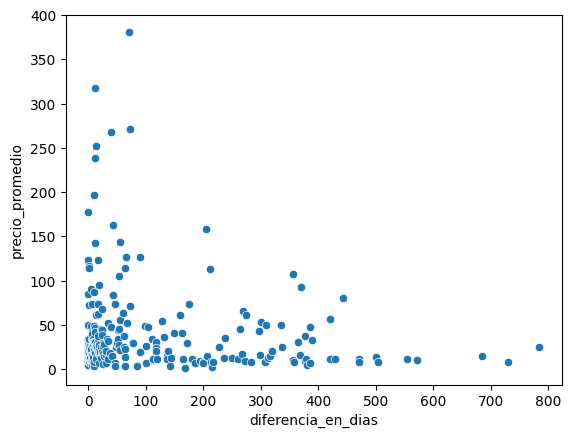

In [82]:
# Crear gráfico de dispersión
sns.scatterplot(x="diferencia_en_dias", y="precio_promedio", data=precio_promedio)
# Mostrar gráfico
plt.show()


_______________

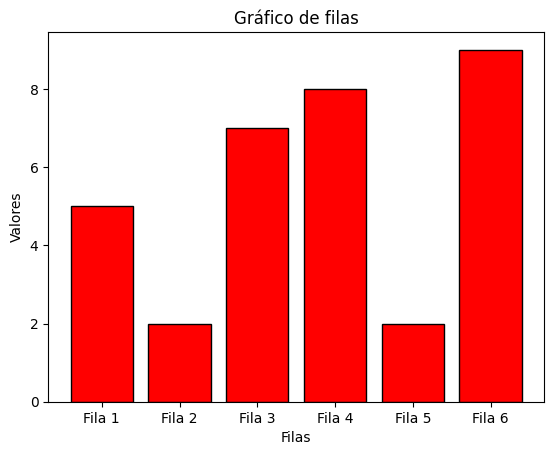

In [50]:
datos = [5, 2, 7, 8, 2, 9]
filas = ["Fila 1", "Fila 2", "Fila 3", "Fila 4", "Fila 5", "Fila 6"]
plt.bar(filas, datos, color="red", edgecolor="black")
plt.title("Gráfico de filas")
plt.xlabel("Filas")
plt.ylabel("Valores")
plt.show()


__________________________________

    última venta

In [51]:
# Primera venta desde su lanzamiento
ultima_venta=data_mkp.copy()
# Se agrupa por id_producto y se aplica la función de agregación min() a la columna venta
UV_fecha_venta= ultima_venta.groupby('product_id')['date_created_x'].agg(min).reset_index(name='Fecha_Primera_Venta')
print(FV_fecha_venta.shape)

FV_fecha_Creacion= ultima_venta.groupby('product_id')['date_created_y'].agg(min).reset_index(name='Fecha_Creacion_producto')
print(FV_fecha_Creacion.shape)
# Unir los dataframe resultantes
primer_venta_fechas=pd.merge(FV_fecha_venta, FV_fecha_Creacion, on='product_id')

(246, 2)
(246, 2)


In [52]:
# Convertir la columna date_created en un objeto datetime
primer_venta_fechas['Fecha_Primera_Venta'] = pd.to_datetime(primer_venta_fechas['Fecha_Primera_Venta'])
primer_venta_fechas['Fecha_Creacion_producto'] = pd.to_datetime(primer_venta_fechas['Fecha_Creacion_producto'])

In [53]:
primer_venta_fechas['diferencia_en_dias'] = (primer_venta_fechas['Fecha_Primera_Venta'] - primer_venta_fechas['Fecha_Creacion_producto']).dt.days
primer_venta_fechas_sorted=primer_venta_fechas.sort_values('diferencia_en_dias', ascending=True)

In [54]:
primer_venta_fechas_sorted

,product_id,Fecha_Primera_Venta,Fecha_Creacion_producto,diferencia_en_dias
214,44381,2023-01-16,2023-01-16,0
205,44170,2023-01-11,2023-01-11,0
169,41666,2022-11-07,2022-11-07,0
204,44107,2023-01-10,2023-01-10,0
159,41196,2022-10-20,2022-10-20,0
...,...,...,...,...
3,29440,2022-10-18,2021-04-12,554
2,28121,2022-08-01,2021-01-07,571
4,29443,2023-02-25,2021-04-12,684
1,28110,2023-01-06,2021-01-06,730


In [55]:
# Eliminar columnas inútiles
primer_venta_fechas_sorted.drop(['Fecha_Primera_Venta', 'Fecha_Creacion_producto'], axis=1, inplace=True)

In [56]:
#tiempo_desde_ultima_venta


    Unión

In [57]:
#primer_ultima_venta=pd.merge(primer_venta_fechas_sorted, , on='product_id')

In [58]:

# Agreamos los nombres de los productos
primer_ultima_venta["nombre_producto"]=data_mkp["name_y"]
# Agreamos la Categoría
primer_ultima_venta["categoria"]=data_mkp["name_y"]
# Agreamos cantidad vendida
primer_ultima_venta["costo"]=data_mkp["name_y"]
# Agreamos stock
primer_ultima_venta["stock"]=data_mkp["name_y"]
# Agreamos Precio
primer_ultima_venta["precio_venta"]=data_mkp["name_y"]
# Agreamos nombre de plataforma
primer_ultima_venta["plataforma"]=data_mkp["name_y"]

NameError: name 'primer_ultima_venta' is not defined

    Más vendidos

In [ ]:
sales_by_product = data_mkp.groupby('product_id')['quantity'].sum().reset_index(name='quantity_sold')
sales_by_product_sorted=sales_by_product.sort_values('quantity_sold', ascending=False)
sales_by_product_sorted.head(10)
